In [2]:
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [9]:

# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

In [3]:
dataset = pd.read_csv('table_orders.csv') # turned into parallel hexagon array
dataset.head()

,time,617777515360944127,617777515367235583,617777516383567871,617777516385140735,617777516387762175,617777516388810751,617777516389335039,617777516392218623,617777516392742911,...,618464969374302207,618464969378234367,618464969583493119,618464969587687423,618464969588735999,618464969642737663,618464969643261951,618464969645883391,618464969647194111,618464969647456255
0,2022-02-03 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-02-03 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-02-03 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-02-03 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-02-03 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = dataset

In [6]:
dataset4 = pd.read_csv('timedddd.csv',sep = ";") # turned into parallel hexagon array
#dataset4 =  dataset.set_index('time')

dataset4 =  dataset4.set_index('time')
dataset4.head()

,618465000000000000,618454472055324000,618454472058994000,618454472059519000,618454472130822000
time,,,,,
03.02.2022 7:00:00,0.0,2.0,3.0,0.0,2.0
03.02.2022 6:00:00,0.0,6.0,13.0,0.0,6.0
03.02.2022 5:00:00,0.0,0.0,0.0,0.0,0.0
03.02.2022 4:00:00,0.0,0.0,0.0,0.0,0.0
03.02.2022 3:00:00,0.0,5.0,4.0,0.0,0.0


In [7]:
datasetttt = dataset4

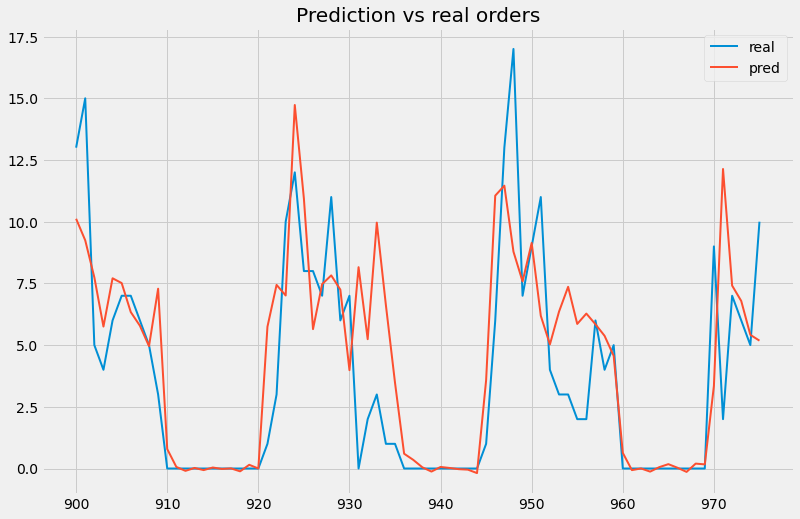

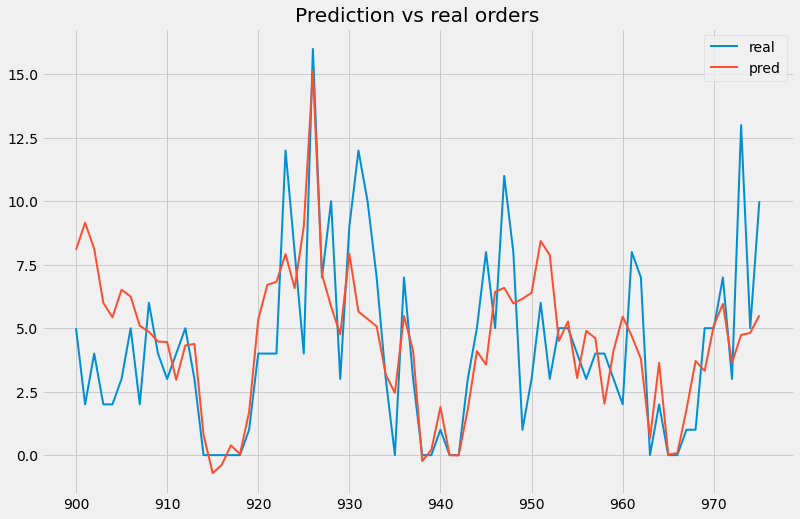

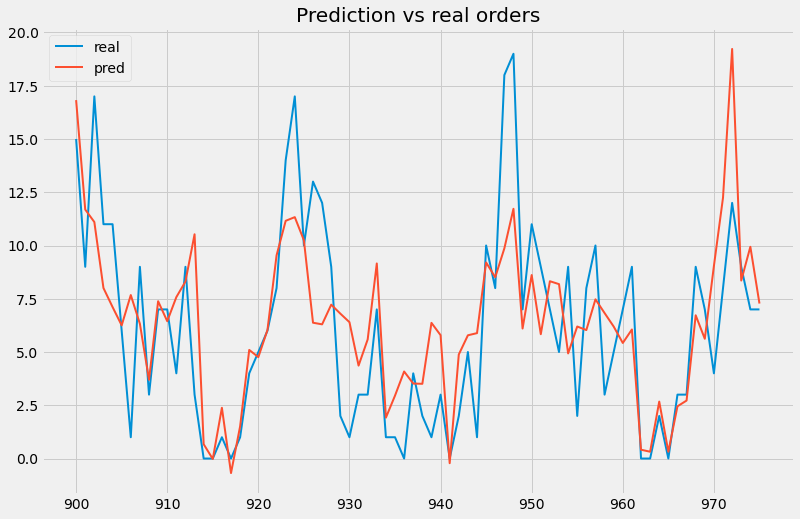

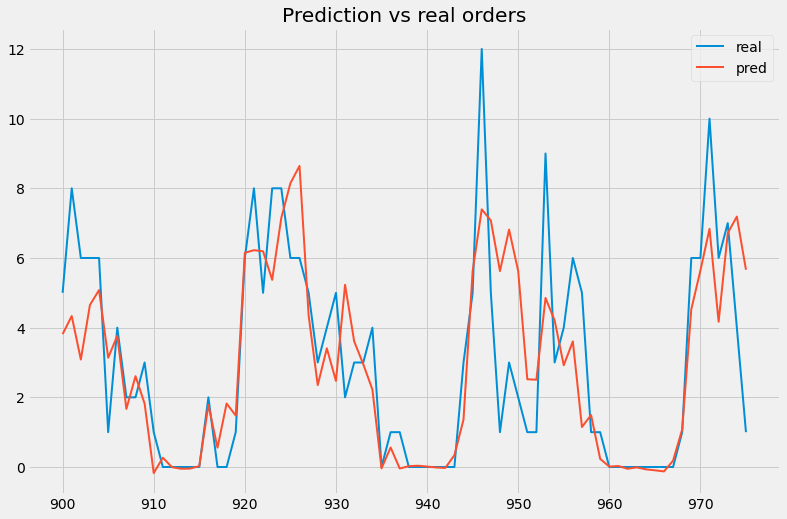

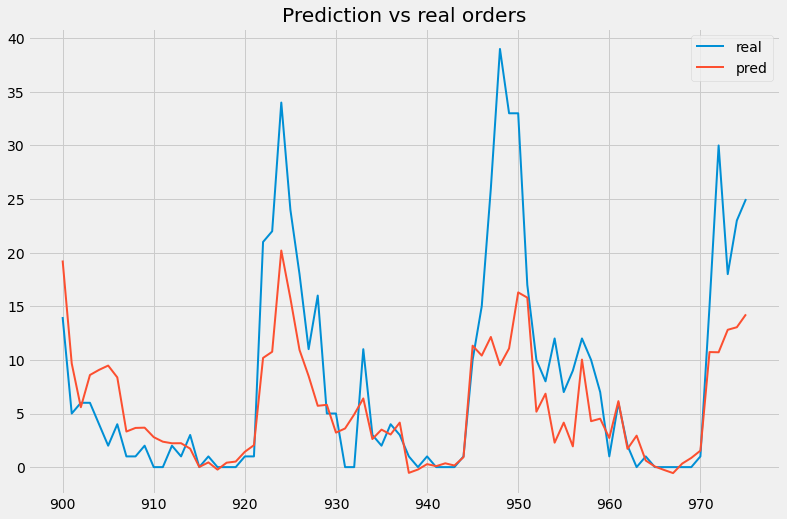

In [11]:
from array import *

ar = []
#data = data.astype(int)
d = datasetttt
#d = 0
d = np.asarray(d)
end_validation = 900
for index in range(datasetttt.shape[1]):
    columnSeriesObj = datasetttt.iloc[:, index]
    columnSeriesObj = pd.Series(list(columnSeriesObj))
    forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                #steps     = 24, #60
                lags      = 20 # This value will be replaced in the grid search
             )
    
    columnSeriesObj1 = columnSeriesObj[48:1024]
    columnSeriesObj2 = columnSeriesObj[24:1000]
    #columnSeriesObj3 = columnSeriesObj[24:1000]
    columnSeriesObj3 = columnSeriesObj[0:976]
# Regressor's hyperparameters
    param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}
# Lags used as predictors
    lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
     
    forecaster.fit(
                    y    = pd.Series(list(columnSeriesObj2)),
                    exog = columnSeriesObj1
                  )

    metric, predictions = backtesting_forecaster(
        
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj2)),
                            exog       = columnSeriesObj3,
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

#for index in range(data.shape[1]):
    #columnSeriesObj = data.iloc[:, index]
    #columnSeriesObj = pd.Series(list(columnSeriesObj))                      
    fig, ax = plt.subplots(figsize=(12, 8))
    columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();
    ar.append(predictions.copy())
    #d[index, :] = d[index, :] + predictions

In [ ]:
  results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = pd.Series(list(columnSeriesObj2)),#data[:,index],table11 = pd.Series(list(table1))   
                        exog        = columnSeriesObj1,#data[:,index],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 900,
                        return_best = True,
                        verbose     = False
                  )

In [ ]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15
             )

forecaster.fit(
    y    = pd.Series(list(columnSeriesObj2)),
    exog = columnSeriesObj1
)

forecaster

In [4]:
dataset =  dataset.set_index('time')

,pred
900,10.118872
901,9.245435
902,7.745086
903,5.751033
904,7.708202
...,...
971,12.136400
972,7.411343
973,6.788240
974,5.415759


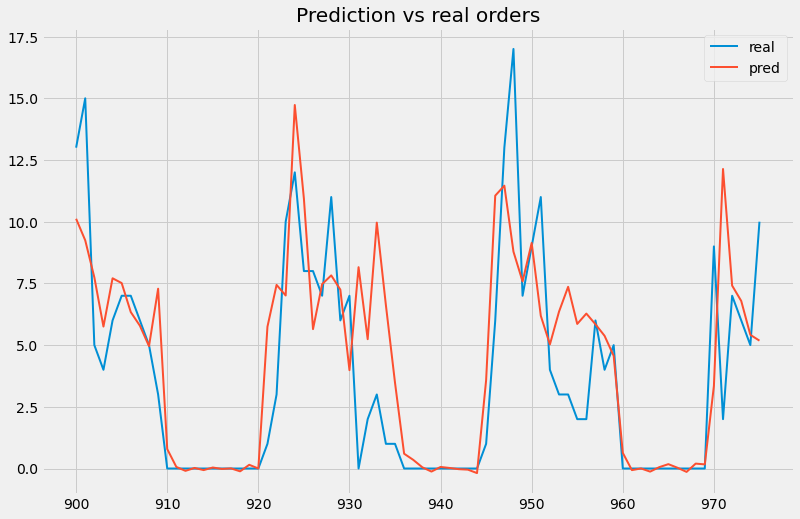

In [24]:
from array import *
ar = []
d = datasetttt
end_validation = 900

def pythond(datasetttt):
    for index in range(datasetttt.shape[1]):
        columnSeriesObj = datasetttt.iloc[:, index]
        columnSeriesObj = pd.Series(list(columnSeriesObj))
        forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                #steps     = 24, #60
                lags      = 20 # This value will be replaced in the grid search
             )
        columnSeriesObj1 = columnSeriesObj[48:1024]
        columnSeriesObj2 = columnSeriesObj[24:1000]
    #columnSeriesObj3 = columnSeriesObj[24:1000]
        columnSeriesObj3 = columnSeriesObj[0:976]
# Regressor's hyperparameters
        param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}
# Lags used as predictors
        lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
     
        forecaster.fit(
                    y    = pd.Series(list(columnSeriesObj2)),
                    exog = columnSeriesObj1
                  )

        metric, predictions = backtesting_forecaster(
        
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj2)),
                            exog       = columnSeriesObj3,
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

#for index in range(data.shape[1]):
    #columnSeriesObj = data.iloc[:, index]
    #columnSeriesObj = pd.Series(list(columnSeriesObj))                      
        fig, ax = plt.subplots(figsize=(12, 8))
        columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
        predictions.plot(linewidth=2, label='prediction', ax=ax)
        ax.set_title('Prediction vs real orders')
        ax.legend();
        ar.append(predictions.copy())
        return predictions
pythond(datasetttt)
    #d[index, :] = d[index, :] + predictions

In [25]:
ar

[          pred
 900  10.118872
 901   9.245435
 902   7.745086
 903   5.751033
 904   7.708202
 ..         ...
 971  12.136400
 972   7.411343
 973   6.788240
 974   5.415759
 975   5.180655
 
 [76 rows x 1 columns]]

In [ ]:
columnSeriesObj1 = columnSeriesObj[24:1000]
columnSeriesObj2 = columnSeriesObj[48:1024]
columnSeriesObj3 = columnSeriesObj[0:976]
columnSeriesObj4 = columnSeriesObj[0:976]

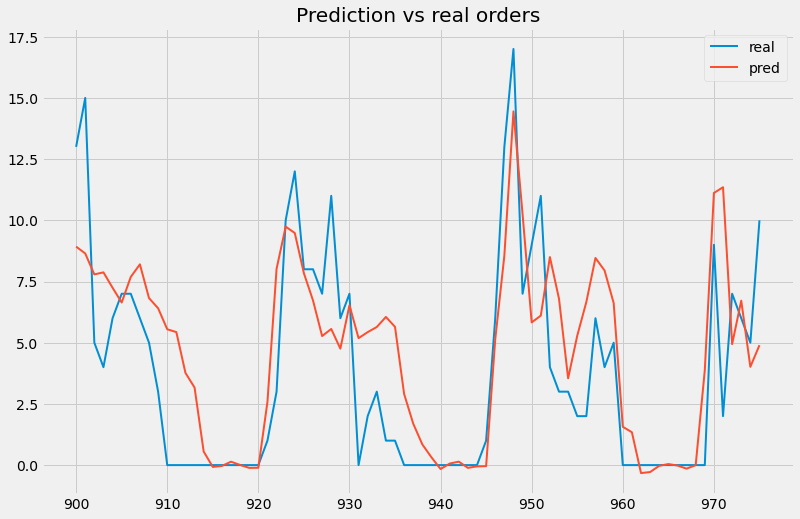

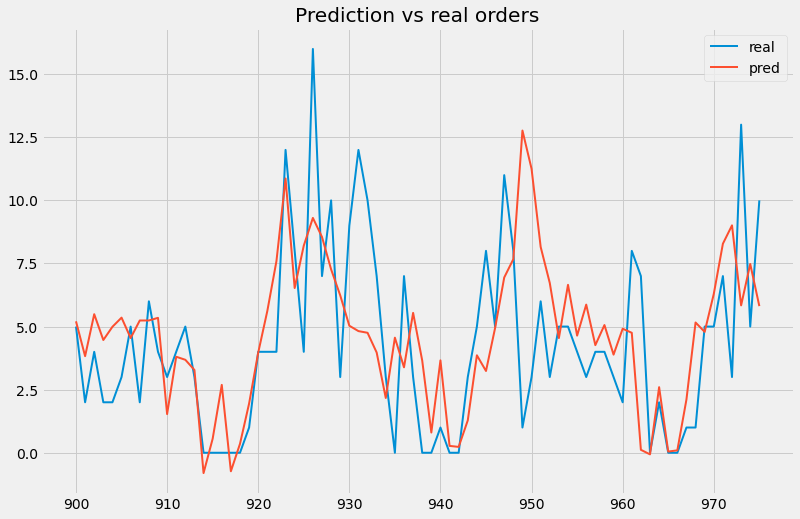

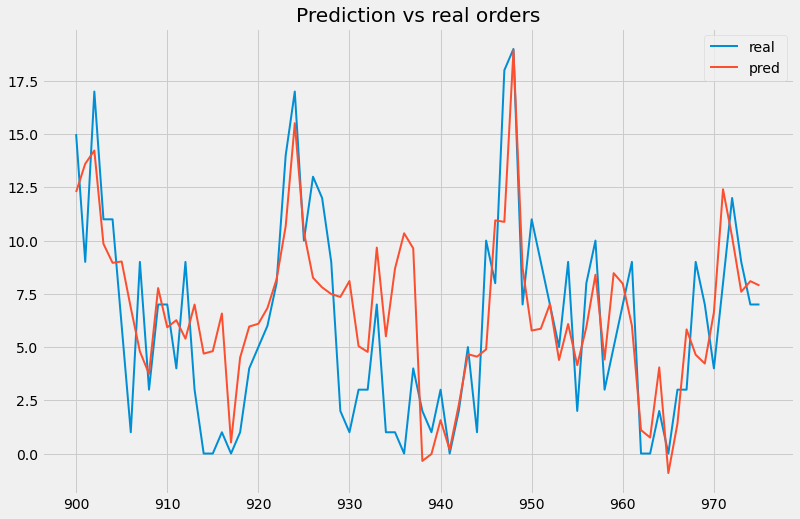

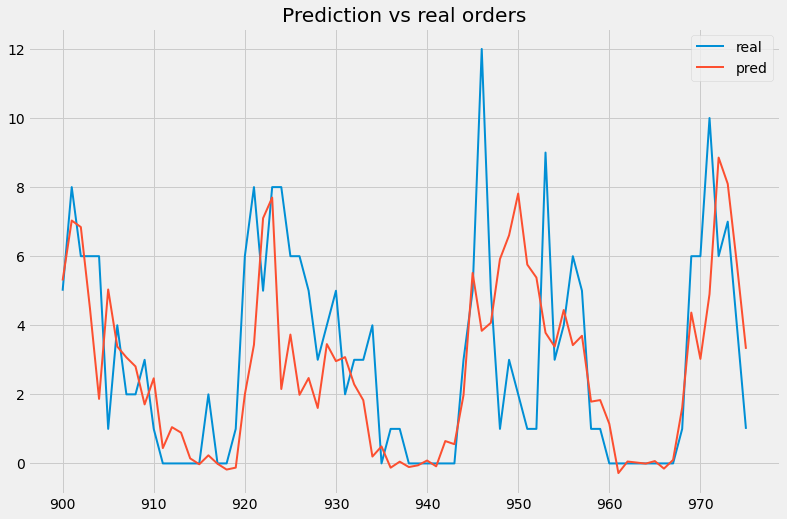

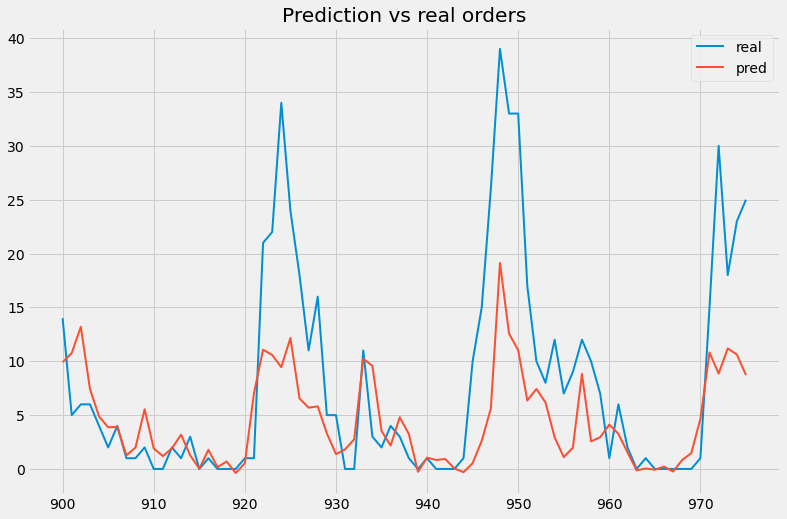

In [26]:
from array import *

ar = []
#data = data.astype(int)
d = datasetttt
#d = 0
d = np.asarray(d)
end_validation = 900
for index in range(datasetttt.shape[1]):
    columnSeriesObj = datasetttt.iloc[:, index]
    columnSeriesObj = pd.Series(list(columnSeriesObj))
    forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                #steps     = 24, #60
                lags      = 20 # This value will be replaced in the grid search
             )
    
    columnSeriesObj1 = columnSeriesObj[48:1024]
    columnSeriesObj2 = columnSeriesObj[24:1000]
    columnSeriesObj3 = columnSeriesObj[24:1000]
    columnSeriesObj4 = columnSeriesObj[0:976]
# Regressor's hyperparameters
    param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}
# Lags used as predictors
    lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
     
    forecaster.fit(
                    y    = pd.Series(list(columnSeriesObj2)),
                    exog = columnSeriesObj1
                  )

    metric, predictions = backtesting_forecaster(
        
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj4)),
                            exog       = columnSeriesObj3,
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

#for index in range(data.shape[1]):
    #columnSeriesObj = data.iloc[:, index]
    #columnSeriesObj = pd.Series(list(columnSeriesObj))                      
    fig, ax = plt.subplots(figsize=(12, 8))
    columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();
    ar.append(predictions.copy())
    #d[index, :] = d[index, :] + predictions

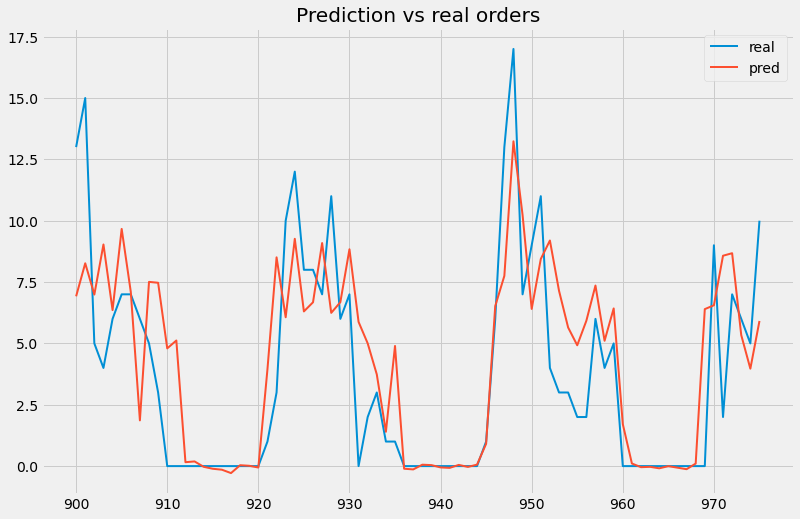

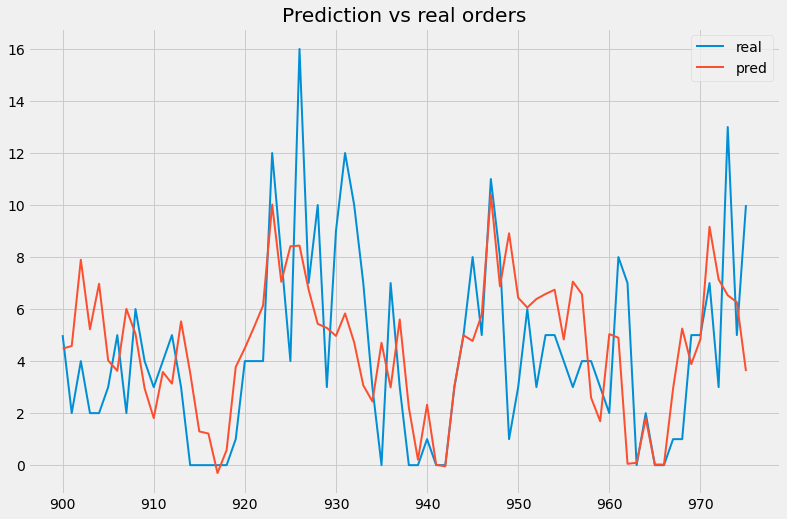

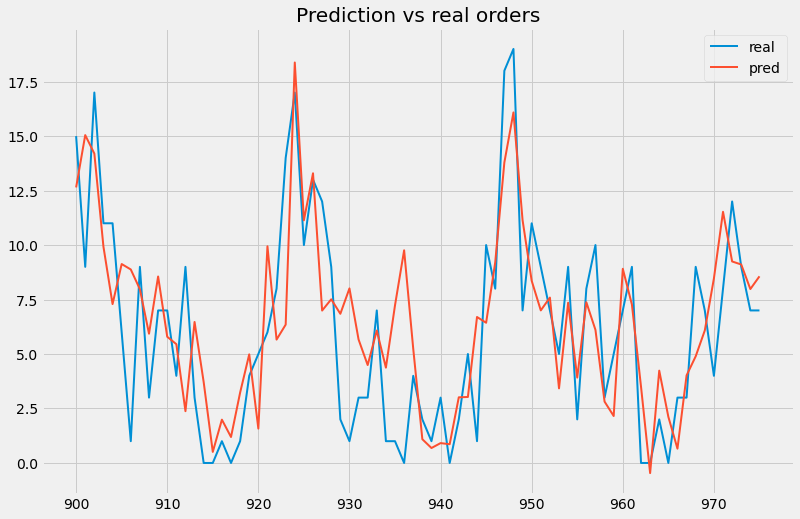

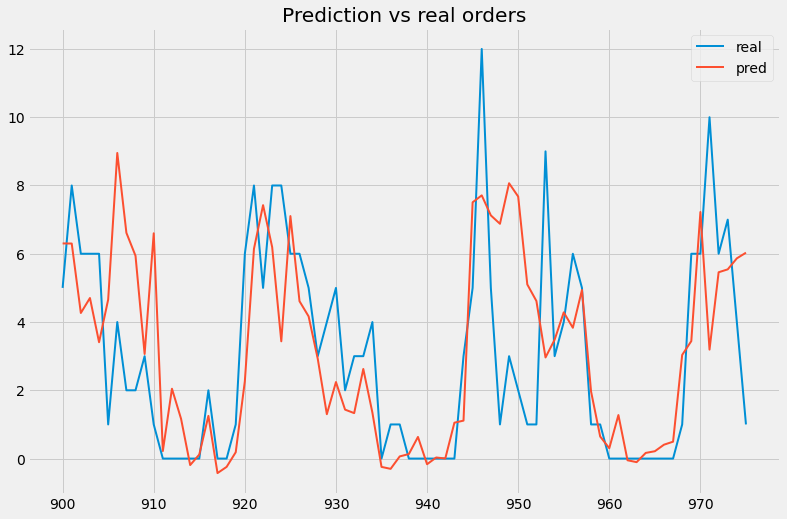

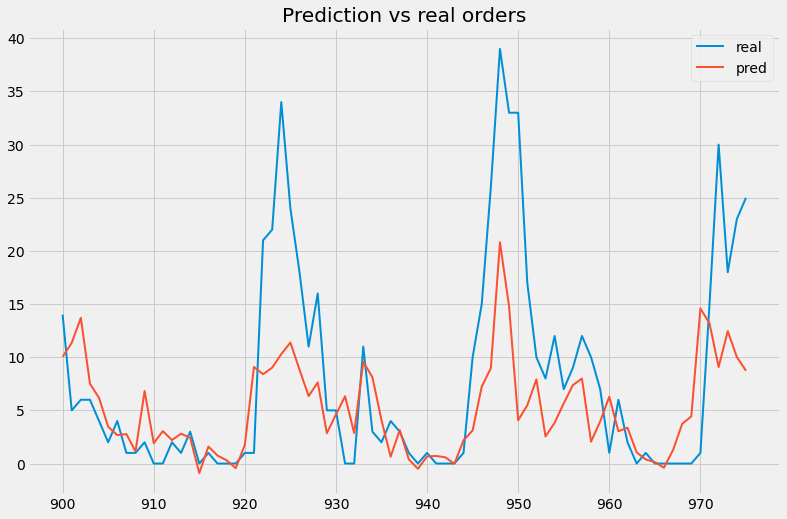

In [27]:
from array import *

ar = []
#data = data.astype(int)
d = datasetttt
#d = 0
d = np.asarray(d)
end_validation = 900
for index in range(datasetttt.shape[1]):
    columnSeriesObj = datasetttt.iloc[:, index]
    columnSeriesObj = pd.Series(list(columnSeriesObj))
    forecaster = ForecasterAutoregMultiOutput(
                regressor = XGBRegressor(objective='reg:squarederror', n_estimators=1000),
                steps     = 24, #60
                lags      = 20 # This value will be replaced in the grid search
             )
    
    columnSeriesObj1 = columnSeriesObj[48:1024]
    columnSeriesObj2 = columnSeriesObj[24:1000]
    columnSeriesObj3 = columnSeriesObj[24:1000]
    columnSeriesObj4 = columnSeriesObj[0:976]
# Regressor's hyperparameters
    param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}
# Lags used as predictors
    lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
     
    forecaster.fit(
                    y    = pd.Series(list(columnSeriesObj2)),
                    exog = columnSeriesObj1
                  )

    metric, predictions = backtesting_forecaster(
        
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj4)),
                            exog       = columnSeriesObj3,
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
    
#for index in range(data.shape[1]):
    #columnSeriesObj = data.iloc[:, index]
    #columnSeriesObj = pd.Series(list(columnSeriesObj))                      
    fig, ax = plt.subplots(figsize=(12, 8))
    columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();
    ar.append(predictions.copy())
    #d[index, :] = d[index, :] + predictions

In [ ]:
from array import *

ar = []
#data = data.astype(int)
d = datasetttt
#d = 0
d = np.asarray(d)
end_validation = 900
for index in range(datasetttt.shape[1]):
    columnSeriesObj = datasetttt.iloc[:, index]
    columnSeriesObj = pd.Series(list(columnSeriesObj))
    forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                steps     = 24, #60
                lags      = 20 # This value will be replaced in the grid search
             )
    
    columnSeriesObj1 = columnSeriesObj[48:1024]
    columnSeriesObj2 = columnSeriesObj[24:1000]
    columnSeriesObj3 = columnSeriesObj[24:1000]
    columnSeriesObj4 = columnSeriesObj[0:976]
# Regressor's hyperparameters
    param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}
# Lags used as predictors
    lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
     
    forecaster.fit(
                    y    = pd.Series(list(columnSeriesObj2)),
                    exog = columnSeriesObj1
                  )

    metric, predictions = backtesting_forecaster(
        
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj4)),
                            exog       = columnSeriesObj3,
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

#for index in range(data.shape[1]):
    #columnSeriesObj = data.iloc[:, index]
    #columnSeriesObj = pd.Series(list(columnSeriesObj))                      
    fig, ax = plt.subplots(figsize=(12, 8))
    columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();
    ar.append(predictions.copy())
    #d[index, :] = d[index, :] + predictions

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS

In [34]:
import pickle

In [ ]:
from array import *
pred = []
ar = []
#data = data.astype(int)
d = datasetttt
#d = 0
d = np.asarray(d)
end_validation = 90
for index in range(datasetttt.shape[1]):
    columnSeriesObj = datasetttt.iloc[:, index]
    columnSeriesObj = pd.Series(list(columnSeriesObj))
    forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=14),
                steps     = 2, #60
                lags      = 20 # This value will be replaced in the grid search
             )
    
    columnSeriesObj1 = columnSeriesObj[48:1024]
    columnSeriesObj2 = columnSeriesObj[24:1000]
    columnSeriesObj3 = columnSeriesObj[24:1000]
    columnSeriesObj4 = columnSeriesObj[0:976]
# Regressor's hyperparameters
    param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}
# Lags used as predictors
    lags_grid = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
     
    forecaster.fit(
                    y    = pd.Series(list(columnSeriesObj2)),
                    exog = columnSeriesObj1
                  )

    metric, predictions = backtesting_forecaster(
        
                            forecaster = forecaster,
                            y          = pd.Series(list(columnSeriesObj4)),
                            exog       = columnSeriesObj3,
                            initial_train_size = len(columnSeriesObj[:end_validation]),
                            steps      = 2,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)
    
#for index in range(data.shape[1]):
    #columnSeriesObj = data.iloc[:, index]
    #columnSeriesObj = pd.Series(list(columnSeriesObj))                      
    fig, ax = plt.subplots(figsize=(12, 8))
    columnSeriesObj.iloc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();
    ar.append(predictions.copy())
    
    PIK = "models.pckl"
    pred.append(forecaster)
    with open("models.pckl", "wb") as f:
        for forecaster in pred:
             pickle.dump(forecaster, f)
            
    with open(PIK, "rb") as f:
        print(pickle.load(f))
        #Ypredict = pickle[0].predict(columnSeriesObj4)
    
    #d[index, :] = d[index, :] + predictions

ForecasterAutoregMultiOutput 
Regressor: RandomForestRegressor(max_depth=14) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
Window size: 20 
Maximum steps predicted: 2 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.series.Series'> 
Exogenous variables names: None 
Training range: [0, 975] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 14, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-03-10 15:10:57 
Last fit date: 2022-03-10 15:10:59 
Skforecast version: 0.4.2 

ForecasterAutoregMultiOutput 
Regressor: RandomForestRegressor(max_depth=14) 
Lags: [ 1  2  3  

In [ ]:
PIK = "pickle.dat"
    pred.append(results_grid)
    data = pred
    with open(PIK, "wb") as f:
        pickle.dump(data, f)
    with open(PIK, 'rb') as f:
        pickle_model = pickle.load(f)

In [ ]:
if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, dataset[i]))